In [1]:
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df=load_dataset('lukebarousse/data_jobs',split='train').to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_US =df[df['job_country']=='United States']
df_exploaded =df_US.explode('job_skills')

In [3]:
df_exploaded=df_exploaded.groupby(['job_skills','job_title_short']).size().reset_index(name='skill_count')
df_sorted=df_exploaded.sort_values(by='skill_count',ascending=False)
df_sorted.head(10)

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
1522,sql,Data Engineer,23958
1208,python,Data Engineer,22762
1611,tableau,Data Analyst,19311
1207,python,Data Analyst,18382
123,aws,Data Engineer,15018


In [4]:
df_total= df_US['job_title_short'].value_counts().head(3).reset_index()

In [5]:
top_3_job_titles = sorted(df_sorted['job_title_short'].unique()[:3].tolist())
df_top_3 = pd.concat([df_sorted[df_sorted['job_title_short'] == job] for job in top_3_job_titles])
df_top_3=df_top_3.reset_index().drop('index',axis=1)
df_top_3=pd.merge(df_top_3,df_total,on=['job_title_short'],how='left')
df_top_3

,job_skills,job_title_short,skill_count,count
0,sql,Data Analyst,34452,67816
1,excel,Data Analyst,27519,67816
2,tableau,Data Analyst,19311,67816
3,python,Data Analyst,18382,67816
4,sas,Data Analyst,13200,67816
...,...,...,...,...
662,couchdb,Data Scientist,1,58830
663,fedora,Data Scientist,1,58830
664,asp.net core,Data Scientist,1,58830
665,nuix,Data Scientist,1,58830


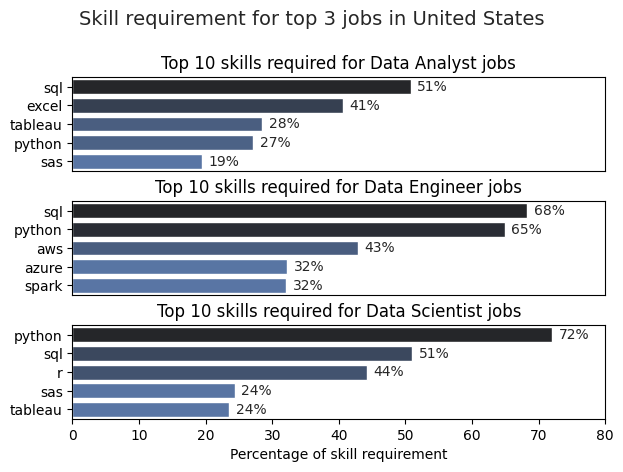

In [6]:
#Visualization
fig,ax= plt.subplots(3,1)
sns.set_theme(style='whitegrid')
for i,job in enumerate(top_3_job_titles):
    df_current_job =df_top_3[df_top_3['job_title_short']==job].head(5)
    df_current_job['skill_pct']=(df_current_job['skill_count']/df_current_job['count'])*100
    sns.barplot(df_current_job,y='job_skills',x='skill_pct',ax=ax[i],hue='skill_count',palette='dark:b_r')
    ax[i].set_ylabel('')
    ax[i].set_title(f'Top 10 skills required for {job} jobs',fontsize=12)
    ax[i].set_xlim(0,80)
    ax[i].legend().set_visible(False)
    if i!=len(top_3_job_titles)-1:
         ax[i].set_xticks([])
         ax[i].set_xlabel('')
    else:
         ax[i].set_xlabel('Percentage of skill requirement')
    for n,v in enumerate(df_current_job['skill_pct']):
        ax[i].text(v+1,n,f'{v:.0f}%',va='center',fontsize=10)
fig.suptitle('Skill requirement for top 3 jobs in United States', fontsize=14)
figuresize=(10,10)
fig.tight_layout(h_pad=0.5)
plt.grid(visible=False)
plt.show()

In [7]:
#skills_trend
import calendar
df_us_da=df_US[df_US['job_title']=='Data Analyst'].copy()

In [8]:
df_us_da['job_posted_month_no'] = df['job_posted_date'].dt.month
df_US_DA= df_us_da.explode('job_skills')
df_pivot=df_US_DA.pivot_table(index='job_posted_month_no',columns='job_skills',aggfunc='size',fill_value=0,)
df_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


In [9]:
df_pivot.loc['total']=df_pivot.sum()
df_pivot.sort_values(by='total',axis=1,inplace=True,ascending=False)
df_pivot.drop('total',inplace=True)
df_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,mariadb,mxnet,next.js,ringcentral,sqlserver,svelte,theano,tidyr,symphony,yarn
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,1,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,0,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,1,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,0,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,1,0,1,0,0,0,0,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,0,0,1,0


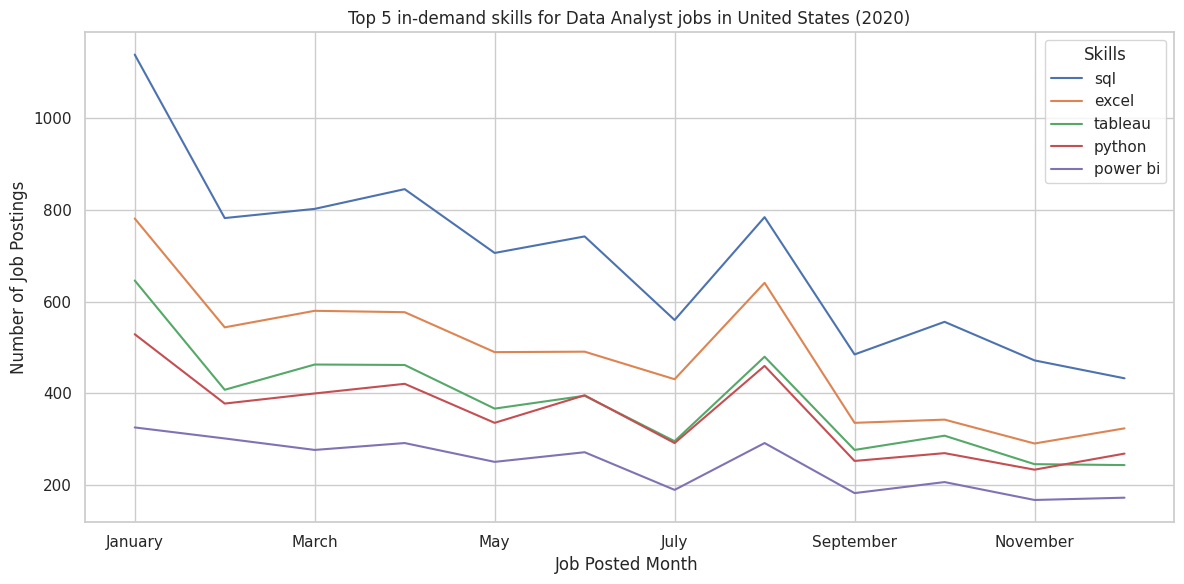

In [10]:
df_Pivot=df_pivot.copy()
df_Pivot.index=df_Pivot.index.map(lambda x:calendar.month_name[x])
df_Pivot.iloc[:, :5].plot(kind='line',figsize=(12,6))
plt.title('Top 5 in-demand skills for Data Analyst jobs in United States (2020)')
plt.xlabel('Job Posted Month ')
plt.ylabel('Number of Job Postings')
plt.legend(title='Skills')
figuresize=(8,8)
plt.tight_layout()

In [11]:
df_total=df_us_da.groupby('job_posted_month_no').size()
df_total

job_posted_month_no
1     1816
2     1284
3     1362
4     1369
5     1156
6     1207
7      955
8     1414
9      856
10    1002
11     848
12     817
dtype: int64

In [12]:
df_pivot=(df_pivot.div(df_total,axis=0))*100
df_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,mariadb,mxnet,next.js,ringcentral,sqlserver,svelte,theano,tidyr,symphony,yarn
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.000000,0.000000,0.055066,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
2,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
3,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
4,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
5,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.086505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
6,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
7,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.000000,0.104712,0.000000,0.104712,0.000000,0.000000,0.0000,0.000000,0.104712
8,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
9,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.116822,0.000000


In [13]:
df_pivot.index=df_pivot.index.map(lambda x:calendar.month_name[x])
df_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,mariadb,mxnet,next.js,ringcentral,sqlserver,svelte,theano,tidyr,symphony,yarn
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
January,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.000000,0.000000,0.055066,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
February,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
March,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
April,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.086505,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
June,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
July,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.000000,0.104712,0.000000,0.104712,0.000000,0.000000,0.0000,0.000000,0.104712
August,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
September,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.116822,0.000000


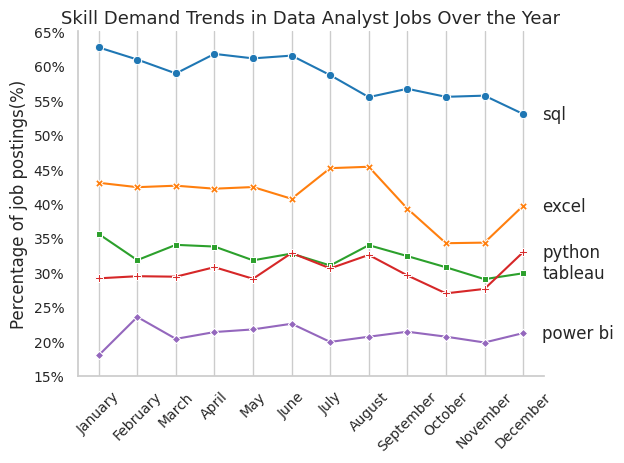

In [14]:
sns.lineplot(data=df_pivot.iloc[:, :5],palette='tab10',dashes=False,markers=True,legend=False)
sns.set_theme(style='ticks')
for i,v in df_pivot.iloc[-1, :5].items():
    plt.text(11.5,v,i,va='center')
plt.title('Skill Demand Trends in Data Analyst Jobs Over the Year',fontsize=13)
plt.xlabel('')
plt.ylabel('Percentage of job postings(%)')
plt.xticks(rotation=45,fontsize=10)
plt.yticks(list(range(15,66,5)),labels= [f'{i}%' for i in list(range(15,66,5))])
plt.yticks(fontsize=10)
plt.grid(axis='y')
plt.tight_layout()
sns.despine()
figuresize=(8,8)
plt.show()